In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

current_font_list= matplotlib.rcParams['font.family']

font_path ="C:\Windows\Fonts\GULIM.TTC"
kfont = matplotlib.font_manager.FontProperties(fname= font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

# stack, unstack
# 행렬전환 된거
df1 = pd.read_csv('이륜차신고현황_시도별_행렬전환O.csv', encoding = 'cp949', header = [0, 1])
df1.drop('시도명(1)', axis = 1, inplace=True)
# print(df1)
# print(df1[('계', '경형')])
df1

# 행렬전환 안된거
# df2 = pd.read_csv('이륜차신고현황_시도별_행렬전환X.csv', encoding = 'cp949')
# print(df2)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_3636\2409923728.py:16: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df1.drop('시도명(1)', axis = 1, inplace=True)


시점 시군구(1)      계                           관용                    자가용  \
         시점 시군구(1)     소계   경형    소형     중형    대형   소계  경형  소형  중형  대형     소계   
0   2023.01    금정구   8175  350  2072   5178   575   79   5   4  68   2   8096   
1   2023.01    기장군   5886  311  1473   3475   627   68   2   8  58   0   5818   
2   2023.01     남구  10764  451  2408   6964   941   31   3  10  18   0  10733   
3   2023.01     동구   4478  185   963   3009   321   57   2  22  32   1   4421   
4   2023.01    동래구   8976  404  2133   5584   855   74   1   1  71   1   8902   
5   2023.01   부산진구  16046  633  3922  10094  1397  118  10  21  86   1  15928   
6   2023.01     북구   8741  414  2075   5532   720   50   1   4  45   0   8691   
7   2023.01    사상구   9444  576  2276   5989   603  161  26  38  96   1   9283   
8   2023.01    사하구  12553  528  2888   8168   969   80   6   2  72   0  12473   
9   2023.01     서구   6068  207  1486   4033   342    9   1   6   2   0   6059   
10  2023.01    수영구   6751  307  1472   4297   675   85   0   4  80   1   6666   
11  2023.01    연제구   7002  279  1591   4451   681  134   5   4  89  36   6868   
12  2023.01    영도구   6421  221  1482   4374   344   50   5   2  43   0   6371   
13  2023.01   해운대구  12791  544  2926   7988  1333   96   7   2  86   1  12695   
14  2023.01   부산기타     12    0    10      2     0    0   0   0   0   0     12   

                            
     경형    소형     중형    대형  
0   345  2068   5110   573  
1   309  1465   3417   627  
2   448  2398   6946   941  
3   183   941   2977   320  
4   403  2132   5513   854  
5   623  3901  10008  1396  
6   413  2071   5487   720  
7   550  2238   5893   602  
8   522  2886   8096   969  
9   206  1480   4031   342  
10  307  1468   4217   674  
11  274  1587   4362   645  
12  216  1480   4331   344  
13  537  2924   7902  1332  
14    0    10      2     0

In [7]:
df2 = pd.read_csv('이륜차신고현황_시도별_행렬전환X.csv', encoding = 'cp949', header = [0, 1, 2])
df2.drop(('시도명(1)', '시도명(1)', '시도명(1)'), axis = 1, inplace=True)
df2.columns.names = ['시점', '소유', '크기']
print(df2.columns)
print(df2)
df2.stack(level = 0)
a = df2.set_index(('시군구(1)', '시군구(1)', '시군구(1)'))
b = a.stack(level = 0)
b.index.names = ['지역', '시점']
c = b.swaplevel(0, 1)
d = c.stack(level = 0)
d = d.reset_index()

MultiIndex([( '시군구(1)', '시군구(1)', '시군구(1)'),
            ('2023.01',      '계',     '소계'),
            ('2023.01',      '계',     '경형'),
            ('2023.01',      '계',     '소형'),
            ('2023.01',      '계',     '중형'),
            ('2023.01',      '계',     '대형'),
            ('2023.01',     '관용',     '소계'),
            ('2023.01',     '관용',     '경형'),
            ('2023.01',     '관용',     '소형'),
            ('2023.01',     '관용',     '중형'),
            ('2023.01',     '관용',     '대형'),
            ('2023.01',    '자가용',     '소계'),
            ('2023.01',    '자가용',     '경형'),
            ('2023.01',    '자가용',     '소형'),
            ('2023.01',    '자가용',     '중형'),
            ('2023.01',    '자가용',     '대형')],
           names=['시점', '소유', '크기'])
시점 시군구(1) 2023.01                                                           \
소유 시군구(1)       계                           관용                    자가용        
크기 시군구(1)      소계   경형    소형     중형    대형   소계  경형  소형  중형  대형     소계   경형   
0     금정

In [ ]:
d
#d.insert(0, '년', d['시점'].apply(lambda x : str(x).split('.')[0]))
#d.insert(1, '월', d['시점'].apply(lambda x : str(x).split('.')[1]))

* 각 시군구별 관용 자가용 소계 비교(바 그래프)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_3636\1398059018.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  e = d.pivot('지역', '소유', '소계')


<AxesSubplot: xlabel='지역'>

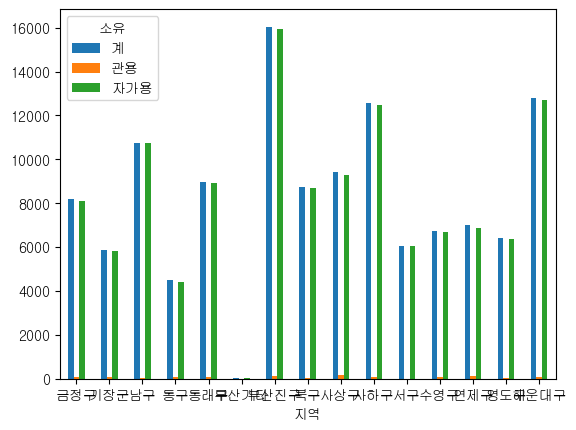

In [8]:
e = d.pivot('지역', '소유', '소계')
e.plot.bar(rot = 0)

# d1 = d.iloc[:, 3:].set_index(['지역', '소유']).stack().unstack(level = 1).reset_index()
# d1.replace('계', np.NaN).dropna()
# d1.drop('계', axis = 0, inplace = True)
# d1

* 2018-2022(5개년) 각 시군구별 이륜차 계 변화 추이

    시도명(1)       시점 시군구(1)     소계   경형    소형    중형    대형
0       부산  2018.01    금정구   8115  380  2402  5017   316
1       부산  2018.01    기장군   4976  266  1591  2905   214
2       부산  2018.01     남구  10535  451  2932  6679   473
3       부산  2018.01     동구   4271  242  1058  2816   155
4       부산  2018.01    동래구   8357  417  2542  5063   335
..     ...      ...    ...    ...  ...   ...   ...   ...
895     부산  2022.12    수영구   6790  310  1475  4323   682
896     부산  2022.12    연제구   6986  278  1591  4427   690
897     부산  2022.12    영도구   6428  224  1482  4387   335
898     부산  2022.12   해운대구  12802  543  2943  7987  1329
899     부산  2022.12   부산기타     12    0    10     2     0

[900 rows x 8 columns]
                   소계   경형    소형    중형    대형
시점      시군구(1)                              
2018.01 금정구      8115  380  2402  5017   316
        기장군      4976  266  1591  2905   214
        남구      10535  451  2932  6679   473
        동구       4271  242  1058  2816   155
        동래구      8357 

C:\Users\ITPS\AppData\Local\Temp\ipykernel_3636\3775907060.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsum = df5.groupby(['시점', '시군구(1)']).sum()


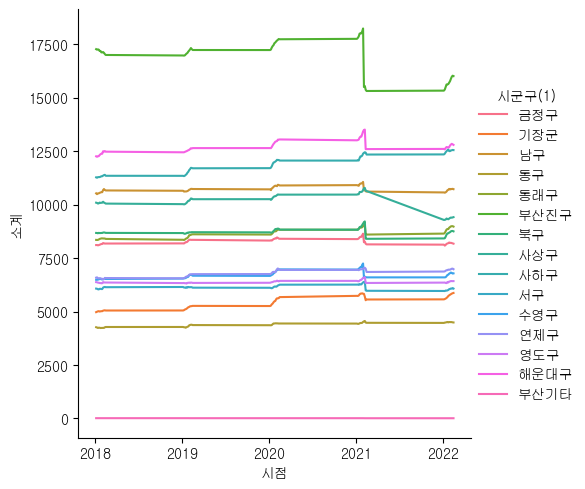

In [10]:
df5 = pd.read_csv('이륜차신고현황_시도별_5개년.csv', encoding = 'cp949', header = 1)
print(df5)
dfsum = df5.groupby(['시점', '시군구(1)']).sum()
print(dfsum)
sns.relplot(data = df5, x = '시점', y = '소계', hue = '시군구(1)', kind = 'line')
# sns.relplot(data = df5, x = '시점', y = '소계', col = '시군구(1)', kind = 'line', col_wrap = 3)

* 코로나 이전(2014 ~ 2018)과 코로나 이후(2018 ~ 2021)
    - 크기 (소형, 중형, 대형) 비율이 다른가
    - 시점별로 소형, 중형, 대형 라인그래프(%로 스케일링)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_3636\2938761462.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_size_sum = df_size.groupby('년').sum()


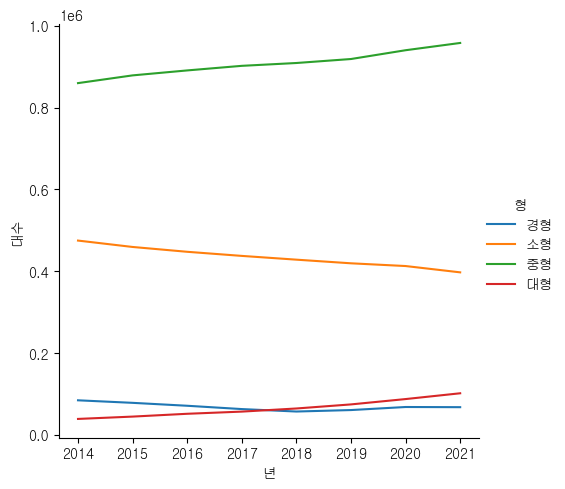

In [11]:
df_size = pd.read_csv('이륜차신고현황_시도별_이륜차크기.csv', encoding = 'cp949', header = 1)
df_size.insert(0, '년', df_size['시점'].apply(lambda x : str(x).split('.')[0]))
df_size_sum = df_size.groupby('년').sum()
df_size_sum.drop(['시점', '소계'], axis = 1, inplace = True)
df_s = df_size_sum.stack().reset_index()
df_s.columns = ['년', '형', '대수']
sns.relplot(data = df_s, x = '년', y = '대수', hue = '형', kind = 'line')
# sns.relplot(data = df_size_sum, x = '년', y = '')